<a href="https://colab.research.google.com/github/disha2101/1Stop_Internship_Codes/blob/main/Prediction_using_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Prediction using Supervised Machine Learning


*To predict the percentage of marks of a student based on the number of study hours*

Author: ***Disha Bahal***

In [1]:
#importing all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#Reading data from remote links
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data imported Successfully")
data.head(10)

Data imported Successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


Let's plot our data points on 2-D Graph to eyeball our dataset and see if we can manually find any relationship between the data.We can create the plot with the following script:

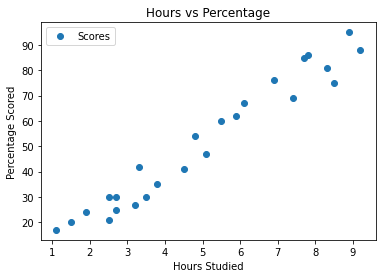

In [6]:
#plotting the distribution of scores
data.plot(x='Hours',y='Scores',style='o')
plt.title("Hours vs Percentage")
plt.xlabel("Hours Studied")
plt.ylabel("Percentage Scored")
plt.show()

**From the above graph we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

##Preparing the data

The next step is to divide the data into "attributes"(inputs) and "labels"(outputs).

In [7]:
x = data.iloc[:,:-1].values
y = data.iloc[:,1].values

Now that we have our attributes and labels,the next step is to split this data into training and test sets.We'll do this by using Scikit-learn's built in train_test_split() method.

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [10]:
y


array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86])

In [11]:
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

Training the Algorithm
We have split our data into training and testing sets, and now is finally the time to train our algorithm

In [12]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression() #using Linear Regression to get the best fit line
regressor.fit(x_train,y_train)
print("Training Complete")

Training Complete


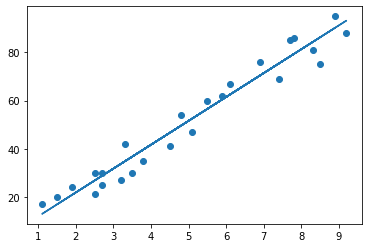

In [14]:
#Plotting the regression line
line = regressor.coef_*x+regressor.intercept_

#Plotting for the test data
plt.scatter(x,y)
plt.plot(x,line);
plt.show()

###**Making Predictions**
Now that we have trained our algorithm,it's time to make some predictions.

In [15]:
print(x_test) #Testing Data - In hours
y_pred = regressor.predict(x_test) #Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [16]:
#Comparing Actual vs Predicted
df = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df


,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [18]:
score_pred = np.array(9.25)
score_pred = score_pred.reshape(-1,1)
predict = regressor.predict(score_pred)
print("No. of hours={}".format(9.25))
print("Predicted Score={}".format(predict[0]))

No. of hours=9.25
Predicted Score=93.69173248737539


###Evaluating the model
The final step is to evaluate the performance of algorithm.This step is particularly important to compare how well different algorithms perform on a particular dataset.For simplicity here,we have chosen the mean square error.There are many such metrics.

In [19]:
from sklearn import metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred))

Mean Absolute Error: 4.183859899002982
